<a href="https://colab.research.google.com/github/Faisal-NSU/cse498R/blob/main/Copy_of_(Glove)CSE498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Sentiment Analysis Model of Food Reviews in Bengali Texts Based on Deep Learning techniques.**

Supervisor- **Afn1**



**Members:**

1.   Mohd. Istiaq Hossain Junaid,1821577642
2.   Faisal Hossain
3.   Udayan shah Upal
4.   Anjana tameem(Unofficial)





#**Preprocessing**


**Step 01 - Punctuation Removal**


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random



import keras
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns




import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [2]:
import pandas as pd
import io
df = pd.read_csv("https://raw.githubusercontent.com/Faisal-NSU/cse498R/main/Food%20Reviews.csv")
df.head()

,Speech,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1


In [3]:
df['Label'].value_counts()

1    520
0    520
Name: Label, dtype: int64

In [4]:
df.duplicated().sum()

0

# Data Pre-Processing



*   Punctuation Removal
*   Tokenization
*   Stopword Removal
*   Stemming
*   Join




In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punctuation(txt):
    punctuation_list = str(string.punctuation) + "।"
    txt_nopunct = "".join([c for c in txt if c not in punctuation_list])
    return txt_nopunct

In [7]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed


In [8]:
df['Removed Puncutation'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Speech,Label,Removed Puncutation
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার


In [9]:
df['remove Eng'] = df['Removed Puncutation'].apply(lambda x:remove_garbage(x))
df

,Speech,Label,Removed Puncutation,remove Eng
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার
...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি


**2.Bangla Tokenization and Bangla Stopword Removing**




In [10]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.7 MB/s 
     |████████████████████████████████| 743 kB 42.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [11]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['remove Eng'].apply(lambda x: remove_stopwords(x,stopwords))
df 

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]"
...,...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে,"[দেখেই, খেয়ে, ফেলতে, ইচ্ছা]"
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই,"[সবসময়ই, অসাধারণ, রান্না, ভাই]"
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...,"[চিকেন, বিরিয়ানিটা, মজা, একটু, খেয়ে, দেখি]"
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি,"[অসম্ভব, সুন্দর, বিরানি, রেসিপি]"


**3. Stemming**

In [12]:
pip install bangla-stemmer

In [13]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [14]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [15]:
df['stemmed'] = df['Removed Stopped word'].apply(lambda x:stmr.stem(x))

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..

In [16]:
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]"


**4.Join**

In [17]:
df['sentence']=df['stemmed'].apply(' '.join)
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed,sentence
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট...",ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘু...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]",অসাধারণ পরিবেশ সুন্দর মার্জিত আন্তরিক
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,...",খাবারের মান খারাপ দাম তুলনায় পরিমান কম ইফত প্ল...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]",ভালো বহুত খেয়েছি বাসা একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]",খাইসি খুব মজ


In [18]:
!gdown --id 1OH3pxJwoUCyGjYTp6EVVKELmNTib0fGT
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/bn_glove.39M.300d.txt"
#word = "গ্রাম"
#res = bng.closest_word(glove_path, word)
#print(res)
#vec = bng.word2vec(glove_path, word)
#print(vec)

Downloading...
From: https://drive.google.com/uc?id=1OH3pxJwoUCyGjYTp6EVVKELmNTib0fGT
To: /content/bn_glove.39M.300d.txt
100% 512M/512M [00:04<00:00, 121MB/s]


In [19]:
reviews = df['sentence']


In [20]:
reviews_list = []
for i in range(len(reviews)):
    reviews_list.append(reviews[i])

In [21]:
sentiment = df['Label']
y = np.array(list(map(lambda x: 1 if x == 1 else 0, sentiment)))


xtrain, xtest, ytrain, ytest = train_test_split(df['sentence'],y, shuffle=True, test_size=0.2,stratify= y)
# find the length of the largest sentence in training data
max_len = xtrain.apply(lambda x: len(x)).max()
print(f'Max number of words in a text in training data: {max_len}')

Max number of words in a text in training data: 363


In [22]:
#for data analysis and modeling
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#for text cleaning
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for visualization
import matplotlib.pyplot as plt


In [23]:
max_words = 10000
tokenizer = text.Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(xtrain)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

print('text example:', xtrain[0])
print('sequence of indices(before padding):', xtrain_seq[2])
print('sequence of indices(after padding):', xtrain_pad[2])

text example: ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘুরে মন খারাপ ভাল লাগা এক জায়গা
sequence of indices(before padding): [441, 60, 741, 7, 3, 99, 49]
sequence of indices(after padding): [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

In [24]:
%%time
embedding_vectors = {}
# with open('/kaggle/input/glove6b100d/glove.6B.100d.txt','r',encoding='utf-8') as file:
with open(glove_path,'r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   

Size of vocabulary in GloVe: 178153
CPU times: user 34.2 s, sys: 1.36 s, total: 35.6 s
Wall time: 44.8 s


In [25]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Some out of valubulary words: ['খাবা', 'দিছ', 'মজ', 'মোটামু', 'দিয়']


In [26]:
print(f'{oov_count} out of {vocab_len} words were OOV.')

599 out of 10000 words were OOV.


**LSTM**

In [27]:
EPOCHS = 100
BATCH_SIZE = 16

In [28]:

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation = 'sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,219,777
Trainable params: 219,777
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [29]:
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

In [30]:
%%time

history = lstm_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=[model_checkpoint_callback],verbose=1)


Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.6094
Epoch 00001: val_accuracy improved from -inf to 0.70192, saving model to /tmp/checkpoint
52/52 [==============================] - 11s 113ms/step - loss: 0.6723 - accuracy: 0.6094 - val_loss: 0.6530 - val_accuracy: 0.7019
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.6923
Epoch 00002: val_accuracy improved from 0.70192 to 0.71154, saving model to /tmp/checkpoint
52/52 [==============================] - 5s 96ms/step - loss: 0.6383 - accuracy: 0.6923 - val_loss: 0.6201 - val_accuracy: 0.7115
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 0.5939 - accuracy: 0.7428
Epoch 00003: val_accuracy improved from 0.71154 to 0.75000, saving model to /tmp/checkpoint
52/52 [==============================] - 5s 94ms/step - loss: 0.5939 - accuracy: 0.7428 - val_loss: 0.5813 - val_accuracy: 0.7500
Epoch 4/100
52/52 [==============================]

In [31]:
lstm_model.load_weights(checkpoint_filepath)
loss,accuracy = lstm_model.evaluate(xtest_pad, np.asarray(ytest))
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 24ms/step - loss: 0.3587 - accuracy: 0.8750
loss: 0.3586975634098053
Accuracy: 0.875


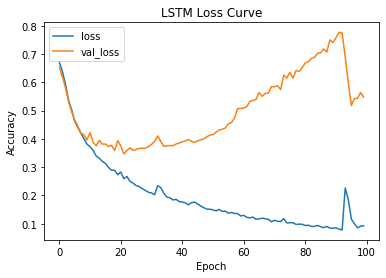

In [32]:
from matplotlib import pyplot as plt
plt.title("LSTM Loss Curve")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

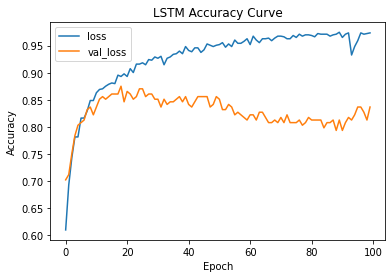

In [33]:
from matplotlib import pyplot as plt
plt.title("LSTM Accuracy Curve")
plt.plot(history.history['accuracy'],label='loss')
plt.plot(history.history['val_accuracy'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

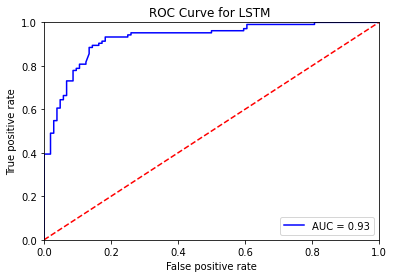

In [34]:
predictions = lstm_model.predict(xtest_pad).ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(np.asarray(ytest), predictions)
auc_keras = metrics.auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for LSTM ')
plt.show()

**GRU**

In [35]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         3000000   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,165,249
Trainable params: 165,249
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [36]:
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

history = gru_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=[model_checkpoint_callback],verbose=1)


Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5805
Epoch 00001: val_accuracy improved from -inf to 0.61538, saving model to /tmp/checkpoint
52/52 [==============================] - 6s 91ms/step - loss: 0.6796 - accuracy: 0.5805 - val_loss: 0.6584 - val_accuracy: 0.6154
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 0.6452 - accuracy: 0.6358
Epoch 00002: val_accuracy improved from 0.61538 to 0.67788, saving model to /tmp/checkpoint
52/52 [==============================] - 4s 82ms/step - loss: 0.6452 - accuracy: 0.6358 - val_loss: 0.6302 - val_accuracy: 0.6779
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 0.6222 - accuracy: 0.6899
Epoch 00003: val_accuracy improved from 0.67788 to 0.69231, saving model to /tmp/checkpoint
52/52 [==============================] - 4s 83ms/step - loss: 0.6222 - accuracy: 0.6899 - val_loss: 0.6033 - val_accuracy: 0.6923
Epoch 4/100
52/52 [==============================] -

In [37]:
gru_model.load_weights(checkpoint_filepath)
loss,accuracy = gru_model.evaluate(xtest_pad, np.asarray(ytest))
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 29ms/step - loss: 0.3768 - accuracy: 0.8750
loss: 0.3767992854118347
Accuracy: 0.875


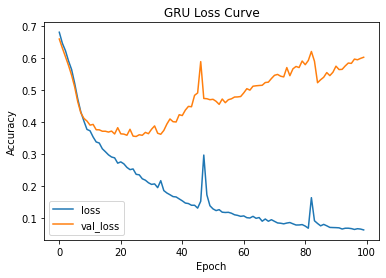

In [38]:
from matplotlib import pyplot as plt
plt.title("GRU Loss Curve")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

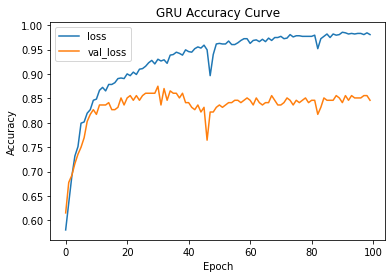

In [39]:
from matplotlib import pyplot as plt
plt.title("GRU Accuracy Curve")
plt.plot(history.history['accuracy'],label='loss')
plt.plot(history.history['val_accuracy'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

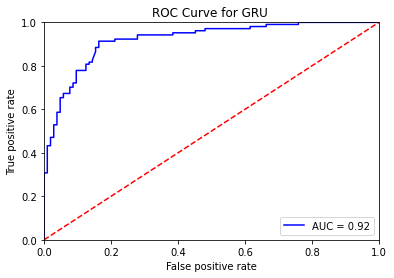

In [40]:
predictions = gru_model.predict(xtest_pad).ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(np.asarray(ytest), predictions)
auc_keras = metrics.auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for GRU ')
plt.show()

**RRN**

In [41]:
from tensorflow.python.keras.layers.recurrent import SimpleRNN
emb_dim = embedding_matrix.shape[1]
RNN = Sequential()
RNN.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
RNN.add(SimpleRNN(128, return_sequences=False))
RNN.add(Dropout(0.5))
RNN.add(Dense(1, activation = 'sigmoid'))
RNN.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(RNN.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         3000000   
                                                                 
 module_wrapper (ModuleWrapp  (None, 128)              54912     
 er)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,055,041
Trainable params: 55,041
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [42]:
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

history = RNN.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)),  batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=[model_checkpoint_callback],verbose=1)

Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.5120
Epoch 00001: val_accuracy improved from -inf to 0.57692, saving model to /tmp/checkpoint
52/52 [==============================] - 20s 363ms/step - loss: 0.7652 - accuracy: 0.5120 - val_loss: 0.7074 - val_accuracy: 0.5769
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.5974
Epoch 00002: val_accuracy improved from 0.57692 to 0.59135, saving model to /tmp/checkpoint
52/52 [==============================] - 18s 350ms/step - loss: 0.6811 - accuracy: 0.5974 - val_loss: 0.6876 - val_accuracy: 0.5913
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.6310
Epoch 00003: val_accuracy improved from 0.59135 to 0.62500, saving model to /tmp/checkpoint
52/52 [==============================] - 18s 353ms/step - loss: 0.6698 - accuracy: 0.6310 - val_loss: 0.6644 - val_accuracy: 0.6250
Epoch 4/100
52/52 [===========================

In [43]:
RNN.load_weights(checkpoint_filepath)
loss,accuracy = RNN.evaluate(xtest_pad, np.asarray(ytest))
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 46ms/step - loss: 0.4753 - accuracy: 0.8029
loss: 0.4752572476863861
Accuracy: 0.8028846383094788


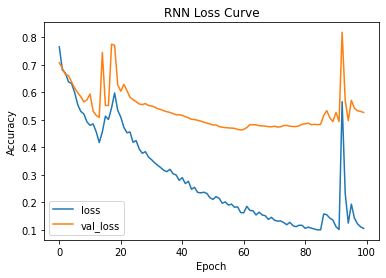

In [44]:
from matplotlib import pyplot as plt
plt.title("RNN Loss Curve")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

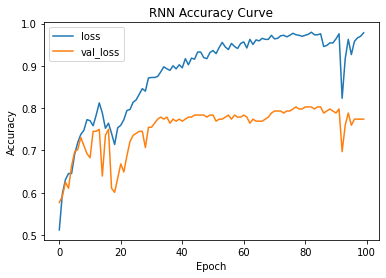

In [45]:
from matplotlib import pyplot as plt
plt.title("RNN Accuracy Curve")
plt.plot(history.history['accuracy'],label='loss')
plt.plot(history.history['val_accuracy'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

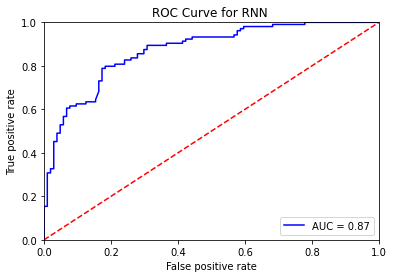

In [46]:
predictions = RNN.predict(xtest_pad).ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(np.asarray(ytest), predictions)
auc_keras = metrics.auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for RNN ')
plt.show()